In [ ]:
%pip install seaborn
%pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
import matplotlib.pyplot as plt

#Loading Dataset
f = sns.load_dataset("tips")

f.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


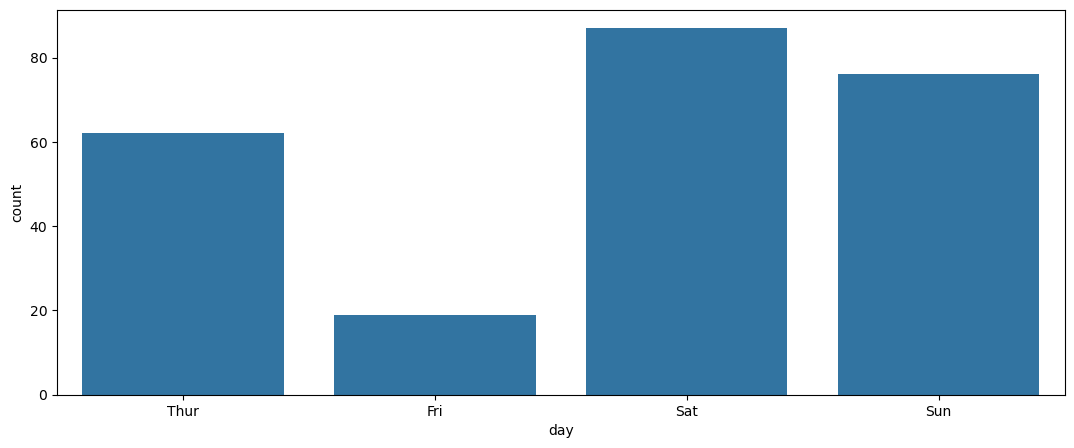

In [4]:
#CountPlot
plt.figure(figsize=[13,5])
sns.countplot(data = f,x="day")
plt.show()

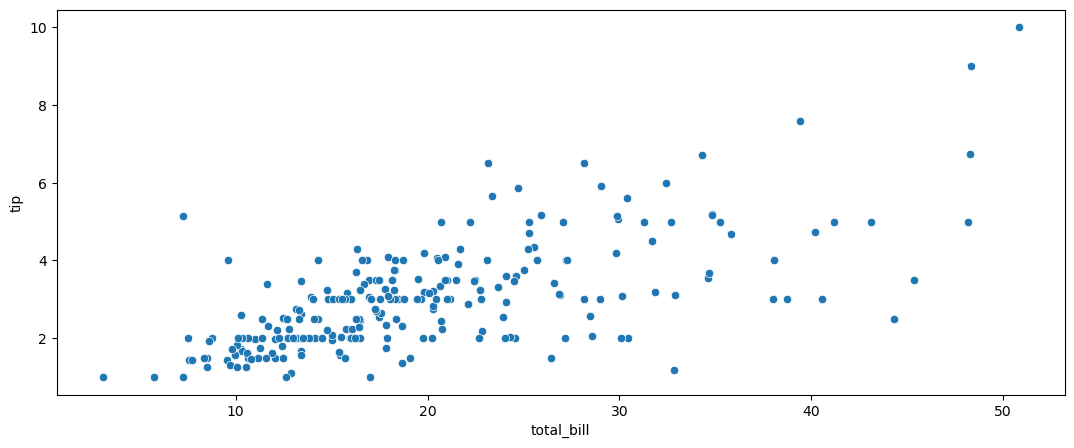

In [5]:
#Scatter Plot
plt.figure(figsize=[13,5])
sns.scatterplot(data = f,x="total_bill",y="tip")
plt.show()

## Data Preprocessing

In [11]:
#Remove the 'tip' Column from the original dataset , after storing it in an another variable , 
# so that we can predict the tip manually afterwards
y = f['tip']
x = f.drop(labels="tip",axis=1)

In [28]:
#Dividing Numerical Columns Separately
num_col = x.select_dtypes(include=["int64","float64"])

num_col.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


In [25]:
#Dividing Categorical Columns Separately
cat_col = x.select_dtypes(include=["category"])

cat_col.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [17]:
## numerical columns - scaling
#standardization = x - mean / std output : 0 to 1
## normalization = x - xmin / xmax - xmin : output : -1 to 1

## char columns
##nominal data - one hot encoding
## ordinal data - label encoder

In [26]:
# numerical columns calculation
mean = f["total_bill"].mean()
std = f["total_bill"].std()

'''scaling,x = 0,[]
#for i in range(len(f)):
    #x.append(f["total_bill"][i])
    #scaling += (x[i] - mean) / std'''
scaling = (16.99 - mean) / std
scaling

-0.31406574275923616

## Scaling for Numerical Values

In [33]:
#Scaling is Performed to Avoid bias (Priority) values by the model and create a common scale for all the available columns
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaling = StandardScaler()

num_scaling = pd.DataFrame(scaling.fit_transform(num_col), # fit - Learn the dataset , 
                                                           # transform - Apply the learnt data on Another dataset
                                                           # fit_transform - Apply the learnt data on the same dataset
                      index=num_col.index,
                      columns=num_col.columns)
num_scaling

,total_bill,size
0,-0.314711,-0.600193
1,-1.063235,0.453383
2,0.137780,0.453383
3,0.438315,-0.600193
4,0.540745,1.506958
...,...,...
239,1.040511,0.453383
240,0.832275,-0.600193
241,0.324630,-0.600193
242,-0.221287,-0.600193


## Scaling for Categorical Values
#### Label Encoder

In [56]:
# It Takes 'Unique Values' from the Each Column of Categorical column Separately ,
# Sorts them out Alphabetically and Assigns Numbers Starting from 0 to n-1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [74]:
for i in cat_col.columns:
    cat_col[i] = le.fit_transform(cat_col[i])

# cat_col["day"].unique() - {0:Friday , 1:saturday, 2:Sunday, 3:Thursday}
cat_col.head(100)


,sex,smoker,day,time
0,0,0,2,0
1,1,0,2,0
2,1,0,2,0
3,1,0,2,0
4,0,0,2,0
...,...,...,...,...
95,1,1,0,0
96,1,1,0,0
97,1,1,0,0
98,1,1,0,0


In [77]:
# Concat (add) two divided numerical and categorical values back together for Training and Test
data = pd.concat([num_scaling,cat_col],axis=1)
data.head()

,total_bill,size,sex,smoker,day,time
0,-0.314711,-0.600193,0,0,2,0
1,-1.063235,0.453383,1,0,2,0
2,0.137780,0.453383,1,0,2,0
3,0.438315,-0.600193,1,0,2,0
4,0.540745,1.506958,0,0,2,0


In [78]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data,y,
                                                 test_size=0.2,
                                                random_state=45)